In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector

In [3]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="sehgal@sph",
    database="tstdb")

df=pd.read_sql_query("Select * from studmarks",con)
df

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [4]:
df.dtypes

name         object
gender       object
dob          object
maths         int64
physics       int64
chemistry     int64
english       int64
biology       int64
economics     int64
history       int64
civics        int64
dtype: object

In [5]:
df.columns

Index(['name', 'gender', 'dob', 'maths', 'physics', 'chemistry', 'english',
       'biology', 'economics', 'history', 'civics'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

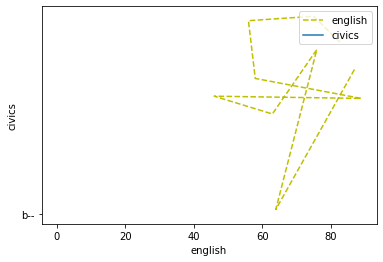

In [7]:
x=df['english']
y=df['civics']
plt.xlabel('english')
plt.ylabel('civics')
plt.plot(x,y,'y--','b--')
plt.show
plt.legend(labels=['english','civics'],loc='upper right')

Text(0, 0.5, 'english')

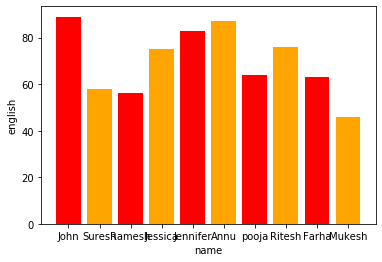

In [8]:
x=df['name']
y=df['history']
plt.figsize=(10,15)
plt.bar(x,y,color=['red','orange'])
plt.xlabel('name')
plt.ylabel('english')


(array([2., 1., 0., 2., 0., 0., 1., 0., 1., 3.]),
 array([45. , 50.1, 55.2, 60.3, 65.4, 70.5, 75.6, 80.7, 85.8, 90.9, 96. ]),
 <a list of 10 Patch objects>)

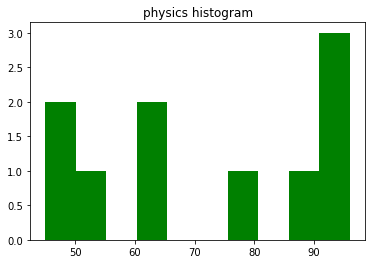

In [9]:
plt.title('physics histogram')
plt.hist(df['physics'],color='green',bins=10)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c9a0060388>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c99ffeb108>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c9a006cc48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c9a006cac8>}

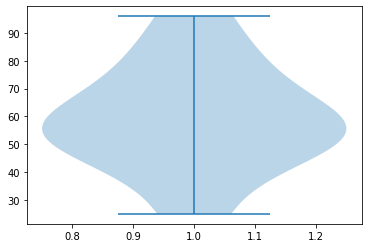

In [10]:
plt.violinplot(df['maths'])

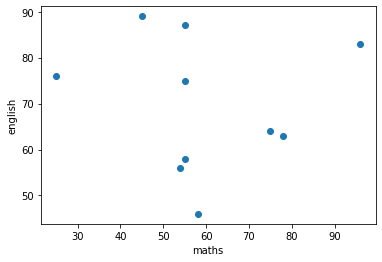

In [11]:
x=df['maths']
y=df['english']
plt.scatter(x,y)
plt.xlabel('maths')
plt.ylabel('english')
plt.show()

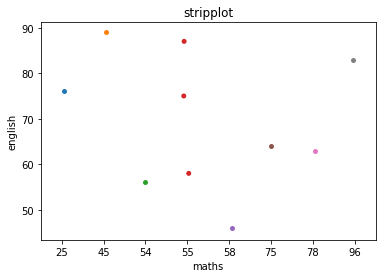

In [12]:
ax=sns.stripplot(x,y);
ax.set(xlabel='maths',ylabel='english')
plt.title('stripplot')
plt.show()

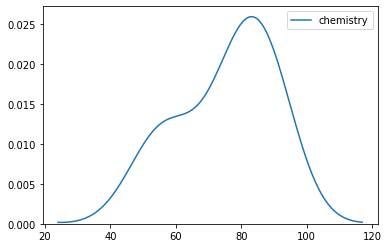

In [13]:
sns.kdeplot(df['chemistry'])

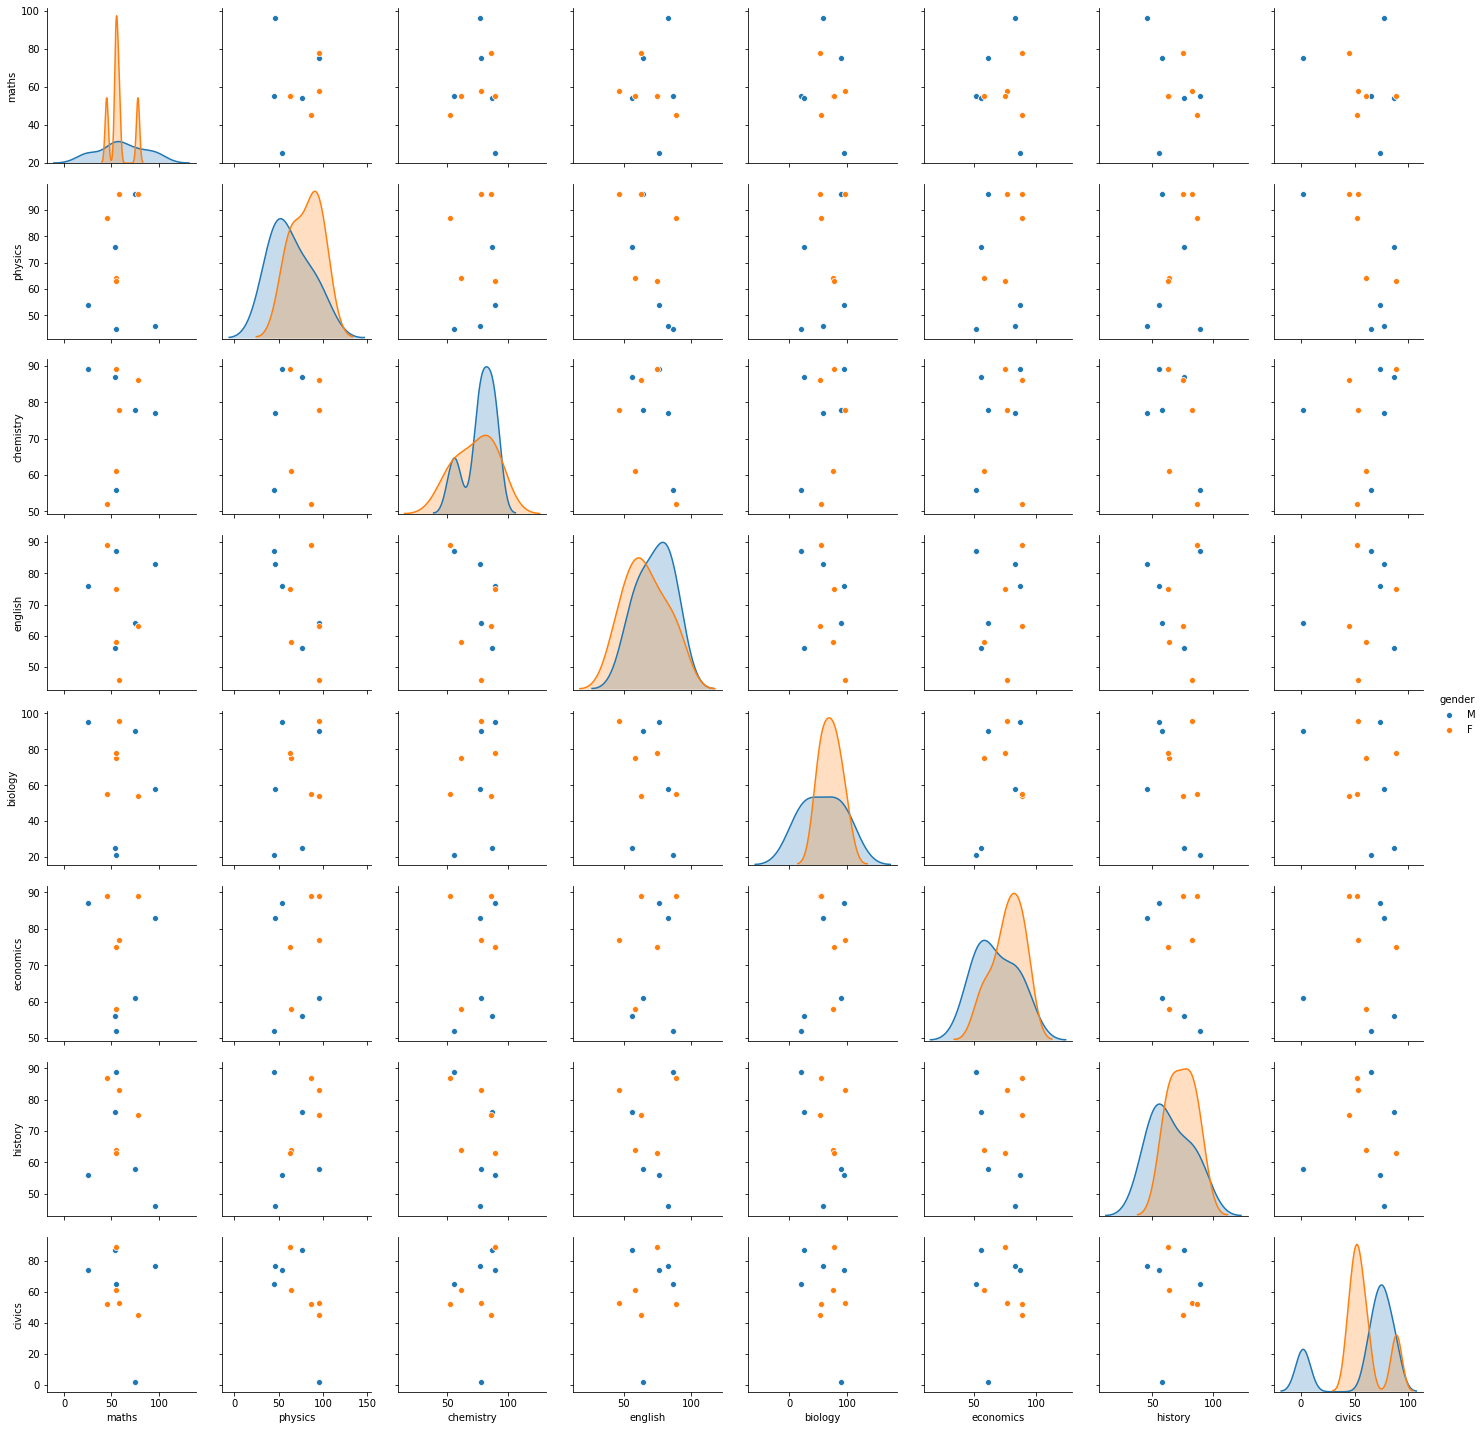

In [14]:
sns.pairplot(df,hue='gender',height=2.5)

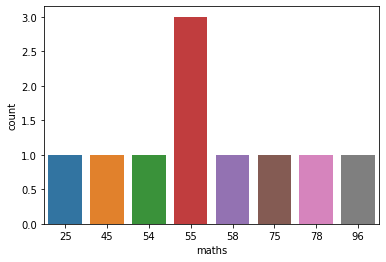

In [15]:
sns.countplot(df['maths'])

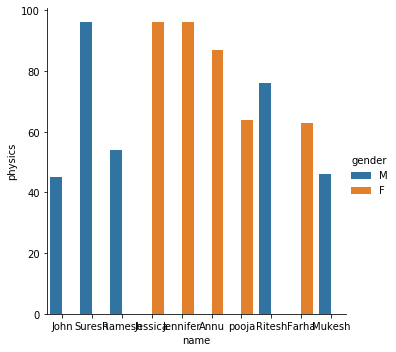

In [16]:
g=sns.catplot(x="name",y="physics",hue="gender",data=df,kind="bar")
plt.show()

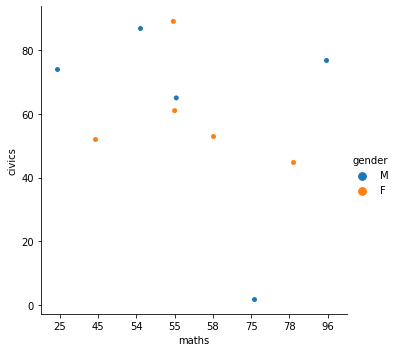

In [17]:
g=sns.catplot(x="maths",y="civics",hue="gender",data=df,kind="strip")
plt.show()

In [18]:
df['chemistry'].value_counts()

78    2
89    2
77    1
61    1
56    1
87    1
86    1
52    1
Name: chemistry, dtype: int64

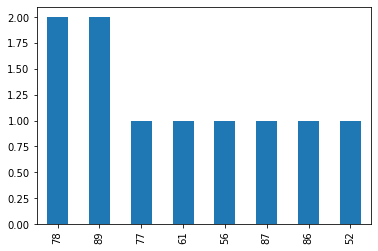

In [19]:
df['chemistry'].value_counts().plot.bar()

In [20]:
df.groupby('gender')['maths'].mean()

gender
F    58.2
M    61.0
Name: maths, dtype: float64

In [21]:
df.groupby('gender')['english'].mean()

gender
F    66.2
M    73.2
Name: english, dtype: float64

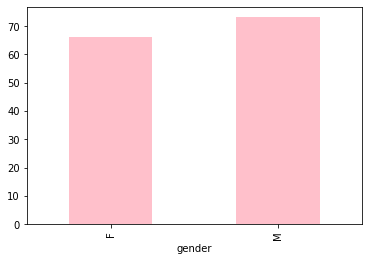

In [22]:
df.groupby('gender')['english'].mean().plot.bar(color="pink")

In [23]:
pd.crosstab(df['gender'],df['name'])

name,Annu,Farha,Jennifer,Jessica,John,Mukesh,Ramesh,Ritesh,Suresh,pooja
gender,,,,,,,,,,
F,1,1,1,1,0,0,0,0,0,1
M,0,0,0,0,1,1,1,1,1,0


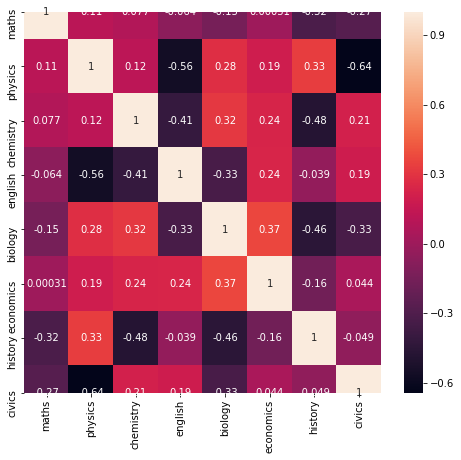

In [24]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [25]:
df.isnull().sum()

name         0
gender       0
dob          0
maths        0
physics      0
chemistry    0
english      0
biology      0
economics    0
history      0
civics       0
dtype: int64

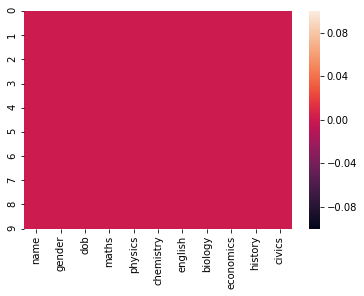

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.describe()

,maths,physics,chemistry,english,biology,economics,history,civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [38]:
collist=df.columns.values
ncol=10
nrows=10

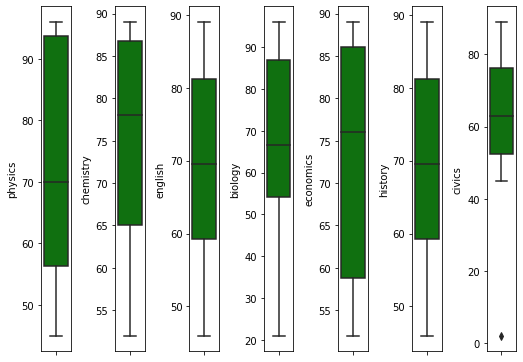

In [39]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()